# Objective : Predicting  house price based on some independentent features

### 1. Import necessary  libraries

In [88]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

import json
import pickle 

## Import libraries for scaling
from sklearn.preprocessing import StandardScaler,RobustScaler  

## Import libraries for model building
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor 
from xgboost import plot_importance, plot_tree, XGBRegressor
from lightgbm import LGBMRegressor

## import libraries for model validation
from sklearn.model_selection import train_test_split,ShuffleSplit,cross_val_score,GridSearchCV  

## Import librararies for metrics
from sklearn import metrics
from sklearn.metrics import mean_squared_error,r2_score

from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

### 2. Import Data

In [2]:
realestate_data=pd.read_csv("Prop_info.csv")
realestate_data

,carpetArea,areaUnit,price,status,latitude,longitude,locality,propertyName,floors,bedRoom
0,396.500,sq.ft.,price on req,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,1
1,622.500,sq.ft.,price on req,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,2
2,217.190,sq.ft.,1954028,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,0
3,473.500,sq.ft.,4948415,Ready To Move,19.207707,73.111643,Dombivli East,Regency Anantam,23,1
4,689.000,sq.ft.,7800834.5,Ready To Move,19.207707,73.111643,Dombivli East,Regency Anantam,23,2
...,...,...,...,...,...,...,...,...,...,...
1069,541.450,sq.ft.,8500000,Ready to move,19.216143,73.098962,Dombivli East,Lodha Palava Casa Rio Gold,8,1
1070,406.850,sq.ft.,4741049,Ready To Move,19.208666,73.107237,MIDC,Milap Nagar,6,2
1071,580.265,sq.ft.,6803589,Ready To Move,19.207109,73.101212,Dombivli East,Rohit Shiv Kripa Residency,12,2
1072,760.970,sq.ft.,9546755.5,Ready To Move,19.210405,73.102739,Dombivli East,Reliable Arcade,7,1


## 3.Data Understanding

In [3]:
realestate_data.head()

,carpetArea,areaUnit,price,status,latitude,longitude,locality,propertyName,floors,bedRoom
0,396.50,sq.ft.,price on req,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,1
1,622.50,sq.ft.,price on req,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,2
2,217.19,sq.ft.,1954028,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,0
3,473.50,sq.ft.,4948415,Ready To Move,19.207707,73.111643,Dombivli East,Regency Anantam,23,1
4,689.00,sq.ft.,7800834.5,Ready To Move,19.207707,73.111643,Dombivli East,Regency Anantam,23,2


In [4]:
print("The dataset shape is:",realestate_data.shape)

The dataset shape is: (1074, 10)


In [5]:
realestate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1074 entries, 0 to 1073
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   carpetArea    1074 non-null   float64
 1   areaUnit      1074 non-null   object 
 2   price         1074 non-null   object 
 3   status        1074 non-null   object 
 4   latitude      1074 non-null   float64
 5   longitude     1074 non-null   float64
 6   locality      1074 non-null   object 
 7   propertyName  1074 non-null   object 
 8   floors        1074 non-null   int64  
 9   bedRoom       1074 non-null   int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 84.0+ KB


#### Under standing category variables  'Status',  'locality', 'propertyName'

In [6]:
realestate_data['status'].unique()

array(['Ready To Move', 'Under Construction', 'New Launch',
       'Ready to move'], dtype=object)

#### Here we can see that ready to move is repeated because of starting letter is capital so replacing it correctly.

In [7]:
## replacing 'Ready to move' to Ready To Move'
realestate_data['status']=realestate_data['status'].replace('Ready To Move','Ready to move')
realestate_data.head()

,carpetArea,areaUnit,price,status,latitude,longitude,locality,propertyName,floors,bedRoom
0,396.50,sq.ft.,price on req,Ready to move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,1
1,622.50,sq.ft.,price on req,Ready to move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,2
2,217.19,sq.ft.,1954028,Ready to move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,0
3,473.50,sq.ft.,4948415,Ready to move,19.207707,73.111643,Dombivli East,Regency Anantam,23,1
4,689.00,sq.ft.,7800834.5,Ready to move,19.207707,73.111643,Dombivli East,Regency Anantam,23,2


In [8]:
realestate_data['status'].unique()

array(['Ready to move', 'Under Construction', 'New Launch'], dtype=object)

In [9]:
print("There are " ,len(realestate_data['locality'].unique()), "unique localities in our dataset")
realestate_data['locality'].unique()

There are  33 unique localities in our dataset


array(['Dombivli East', 'thakurli', 'Bhadra Nagar', 'Dattanagar',
       'Golavli', 'Nilje Gaon', 'Azde Gaon', 'Ram Nagar', 'Sagarli',
       'Sunil Nagar', 'Dawadi Gaon', 'Ayodhya Nagari', 'Kumbharkhan Pada',
       'Sagaon', 'Nandivali Gaon', 'Ramnagar', 'Balaji Nagar',
       'Gograswadi', 'Desale Pada', 'Tilak Nagar', 'Pendse Nagar',
       'Nandivali Panchanand', 'Pandurangwadi', 'Kanchangoan',
       'P and T Colony', 'Nandivli', 'Mhatre Nagar', 'Chole Gaon',
       'Sonar Pada', 'MIDC', 'Gandhi Nagar', 'Tukaram Nagar',
       'Raghuveer Nagar'], dtype=object)

In [10]:
realestate_data['locality'].value_counts()

Dombivli East           847
thakurli                 62
Nilje Gaon               23
Gograswadi               13
Sagaon                   13
Kumbharkhan Pada         11
Desale Pada              11
Kanchangoan               9
Sagarli                   8
Azde Gaon                 7
Bhadra Nagar              7
Dawadi Gaon               6
Ramnagar                  6
Nandivli                  6
Dattanagar                5
Sunil Nagar               4
MIDC                      4
Nandivali Gaon            4
P and T Colony            4
Sonar Pada                3
Pandurangwadi             2
Gandhi Nagar              2
Balaji Nagar              2
Nandivali Panchanand      2
Pendse Nagar              2
Tilak Nagar               2
Ayodhya Nagari            2
Golavli                   2
Mhatre Nagar              1
Chole Gaon                1
Ram Nagar                 1
Tukaram Nagar             1
Raghuveer Nagar           1
Name: locality, dtype: int64

In [11]:
print( "There are ", len(realestate_data['propertyName'].unique()),"unique Property names" )
realestate_data['propertyName'].unique()

There are  434 unique Property names


array(['Marathon Nexworld', 'Regency Anantam', 'Lodha Codename Premier',
       'Sundaram Shanidas Pride', 'Balaji Govind', 'Balaji Vasant',
       'Venus Skky City', 'Runwal Gardens', 'Lodha Casa Bella Gold',
       'Lodha Palava Downtown', 'Paradise Sai World Dreams',
       'Runwal My City', 'Om Sudama Gold', 'Lodha Palava Lakeshore Green',
       'Lodha Panacea', 'Lodha Serenity', 'Lodha Palava City',
       'Lodha Casa Marvella', 'Lodha Lakeshore Greens', 'Mahaavir Pride',
       'Casa Lagoona, Lakeshore Greens, Palava City ', 'mahaveer heights',
       'Shree Shrinathji CHS', 'Sunraj Supreme', 'Lodha Casa Bella',
       'Lodha Palava Downtown Aurelia', 'Siddharth Riverwood Park',
       'Lodha Casa Bella Majestica', 'Ganraj Eknath Residency',
       'Lodha Casa Rio Gold', 'on request', 'mandar towe', 'nirmal chs.',
       'Sneh bandhan chs', 'sneha chs.', 'bhagawati chs.',
       'vinayak smruti chs.', 'shundaram chs.', 'guru mauli chs.',
       'Globe Paradise', 'Lodha Lakeshore

In [12]:
property_count=realestate_data['propertyName'].value_counts()
property_count

Lodha Palava City             97
Lodha Lakeshore Greens        85
Runwal My City                69
Lodha Casa Bella Gold         51
Lodha Palava Downtown         37
                              ..
Sunshine Sunrise Residency     1
Amber Harmony                  1
Amber Vista                    1
Shubham Apartment              1
Vitthal plaza Gograswadi       1
Name: propertyName, Length: 434, dtype: int64

In [13]:
len(property_count[property_count<=10])

423

In [14]:
property_less_10=property_count[property_count<=10]


In [15]:
## if the location have less tahn 10 or houses thant that location are know as other location
realestate_data['propertyName']=realestate_data['propertyName'].apply(lambda x:'other' if x in property_less_10 else x)

In [16]:
locality_count=realestate_data['locality'].value_counts()
locality_count

Dombivli East           847
thakurli                 62
Nilje Gaon               23
Gograswadi               13
Sagaon                   13
Kumbharkhan Pada         11
Desale Pada              11
Kanchangoan               9
Sagarli                   8
Azde Gaon                 7
Bhadra Nagar              7
Dawadi Gaon               6
Ramnagar                  6
Nandivli                  6
Dattanagar                5
Sunil Nagar               4
MIDC                      4
Nandivali Gaon            4
P and T Colony            4
Sonar Pada                3
Pandurangwadi             2
Gandhi Nagar              2
Balaji Nagar              2
Nandivali Panchanand      2
Pendse Nagar              2
Tilak Nagar               2
Ayodhya Nagari            2
Golavli                   2
Mhatre Nagar              1
Chole Gaon                1
Ram Nagar                 1
Tukaram Nagar             1
Raghuveer Nagar           1
Name: locality, dtype: int64

In [17]:
locality_less_10=locality_count[locality_count<=10]

In [18]:
## if the location have less tahn 10 or houses thant that location are know as other location
realestate_data['locality']=realestate_data['locality'].apply(lambda x:'Other' if x in locality_less_10 else x)

In [19]:
realestate_data

,carpetArea,areaUnit,price,status,latitude,longitude,locality,propertyName,floors,bedRoom
0,396.500,sq.ft.,price on req,Ready to move,19.186546,73.068871,Dombivli East,other,29,1
1,622.500,sq.ft.,price on req,Ready to move,19.186546,73.068871,Dombivli East,other,29,2
2,217.190,sq.ft.,1954028,Ready to move,19.186546,73.068871,Dombivli East,other,29,0
3,473.500,sq.ft.,4948415,Ready to move,19.207707,73.111643,Dombivli East,Regency Anantam,23,1
4,689.000,sq.ft.,7800834.5,Ready to move,19.207707,73.111643,Dombivli East,Regency Anantam,23,2
...,...,...,...,...,...,...,...,...,...,...
1069,541.450,sq.ft.,8500000,Ready to move,19.216143,73.098962,Dombivli East,other,8,1
1070,406.850,sq.ft.,4741049,Ready to move,19.208666,73.107237,Other,other,6,2
1071,580.265,sq.ft.,6803589,Ready to move,19.207109,73.101212,Dombivli East,other,12,2
1072,760.970,sq.ft.,9546755.5,Ready to move,19.210405,73.102739,Dombivli East,other,7,1


In [20]:
len(realestate_data['propertyName'].value_counts())

12

In [21]:
len(realestate_data['locality'].value_counts())

8

In [22]:
realestate_data['bedRoom'].value_counts()

1    530
2    423
3    114
0      5
4      2
Name: bedRoom, dtype: int64

In [23]:
## renaming the columns name
realestate_data.rename(columns={'carpetArea':'carpetArea_in_sqmt'},inplace=True)
## removing columns which are not required for analysis
realestate_data.drop(['areaUnit','latitude','longitude'],axis=1,inplace=True)
realestate_data

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,396.500,price on req,Ready to move,Dombivli East,other,29,1
1,622.500,price on req,Ready to move,Dombivli East,other,29,2
2,217.190,1954028,Ready to move,Dombivli East,other,29,0
3,473.500,4948415,Ready to move,Dombivli East,Regency Anantam,23,1
4,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
...,...,...,...,...,...,...,...
1069,541.450,8500000,Ready to move,Dombivli East,other,8,1
1070,406.850,4741049,Ready to move,Other,other,6,2
1071,580.265,6803589,Ready to move,Dombivli East,other,12,2
1072,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


In [24]:
## removing price on request records from 'realestate_data' dataset 
POR=realestate_data[realestate_data['price']=='price on req'].index
realestate_data.drop(POR,axis=0,inplace=True)
realestate_data=realestate_data.reset_index()

realestate_data

,index,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,2,217.190,1954028,Ready to move,Dombivli East,other,29,0
1,3,473.500,4948415,Ready to move,Dombivli East,Regency Anantam,23,1
2,4,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
3,5,598.000,9015956,Under Construction,Dombivli East,other,7,2
4,6,759.000,14121195,Under Construction,Dombivli East,other,7,3
...,...,...,...,...,...,...,...,...
964,1069,541.450,8500000,Ready to move,Dombivli East,other,8,1
965,1070,406.850,4741049,Ready to move,Other,other,6,2
966,1071,580.265,6803589,Ready to move,Dombivli East,other,12,2
967,1072,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


In [25]:
realestate_data.drop(['index'],axis=1,inplace=True)
realestate_data

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,217.190,1954028,Ready to move,Dombivli East,other,29,0
1,473.500,4948415,Ready to move,Dombivli East,Regency Anantam,23,1
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
3,598.000,9015956,Under Construction,Dombivli East,other,7,2
4,759.000,14121195,Under Construction,Dombivli East,other,7,3
...,...,...,...,...,...,...,...
964,541.450,8500000,Ready to move,Dombivli East,other,8,1
965,406.850,4741049,Ready to move,Other,other,6,2
966,580.265,6803589,Ready to move,Dombivli East,other,12,2
967,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


In [26]:
## changing data types  prices as flot, bedroom and floors are int
realestate_data['floors']=realestate_data['floors'].astype('int64')
realestate_data['bedRoom']=realestate_data['bedRoom'].astype('int64')
realestate_data[['price']]=realestate_data[['price']].astype('float64')
realestate_data

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,217.190,1954028.0,Ready to move,Dombivli East,other,29,0
1,473.500,4948415.0,Ready to move,Dombivli East,Regency Anantam,23,1
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
3,598.000,9015956.0,Under Construction,Dombivli East,other,7,2
4,759.000,14121195.0,Under Construction,Dombivli East,other,7,3
...,...,...,...,...,...,...,...
964,541.450,8500000.0,Ready to move,Dombivli East,other,8,1
965,406.850,4741049.0,Ready to move,Other,other,6,2
966,580.265,6803589.0,Ready to move,Dombivli East,other,12,2
967,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


In [27]:
realestate_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 969 entries, 0 to 968
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   carpetArea_in_sqmt  969 non-null    float64
 1   price               969 non-null    float64
 2   status              969 non-null    object 
 3   locality            969 non-null    object 
 4   propertyName        969 non-null    object 
 5   floors              969 non-null    int64  
 6   bedRoom             969 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 53.1+ KB


In [28]:
realestate_data.duplicated().sum()

8

In [29]:
## dropping duplicate records
realestate_data_duplicates=realestate_data[realestate_data.duplicated()==True].index
realestate_data.drop(realestate_data_duplicates,axis=0,inplace=True)
realestate_data

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,217.190,1954028.0,Ready to move,Dombivli East,other,29,0
1,473.500,4948415.0,Ready to move,Dombivli East,Regency Anantam,23,1
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
3,598.000,9015956.0,Under Construction,Dombivli East,other,7,2
4,759.000,14121195.0,Under Construction,Dombivli East,other,7,3
...,...,...,...,...,...,...,...
964,541.450,8500000.0,Ready to move,Dombivli East,other,8,1
965,406.850,4741049.0,Ready to move,Other,other,6,2
966,580.265,6803589.0,Ready to move,Dombivli East,other,12,2
967,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


## 4.Exploratory Data Analysis

In [30]:
realestate_data.describe(include='all')

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
count,961.000000,9.610000e+02,961,961,961,961.000000,961.000000
unique,NaN,NaN,3,8,12,NaN,NaN
top,NaN,NaN,Ready to move,Dombivli East,other,NaN,NaN
freq,NaN,NaN,902,749,548,NaN,NaN
mean,649.196899,5.493437e+06,NaN,NaN,NaN,12.466181,1.597294
std,1323.819991,4.152284e+06,NaN,NaN,NaN,8.038005,0.687048
min,36.510000,1.150000e+06,NaN,NaN,NaN,0.000000,0.000000
25%,460.000000,3.600000e+06,NaN,NaN,NaN,6.000000,1.000000
50%,572.000000,4.760000e+06,NaN,NaN,NaN,8.000000,1.000000
75%,702.000000,6.200000e+06,NaN,NaN,NaN,18.000000,2.000000


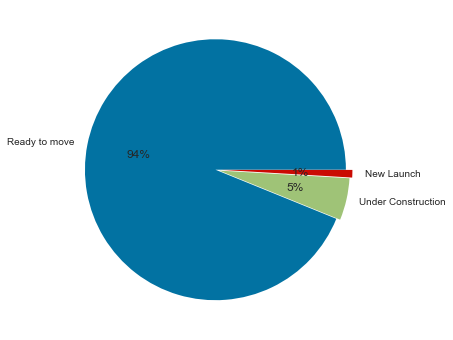

In [31]:
## Pie chart for status
plt.figure(figsize=(6,6))
plt.pie(x = realestate_data['status'].value_counts(),labels=['Ready to move','Under Construction','New Launch'],autopct='%1.0f%%',explode=[0,0.03,0.05])
plt.show()

### From pie chart we can clearly say that most propeties are ready to move status.

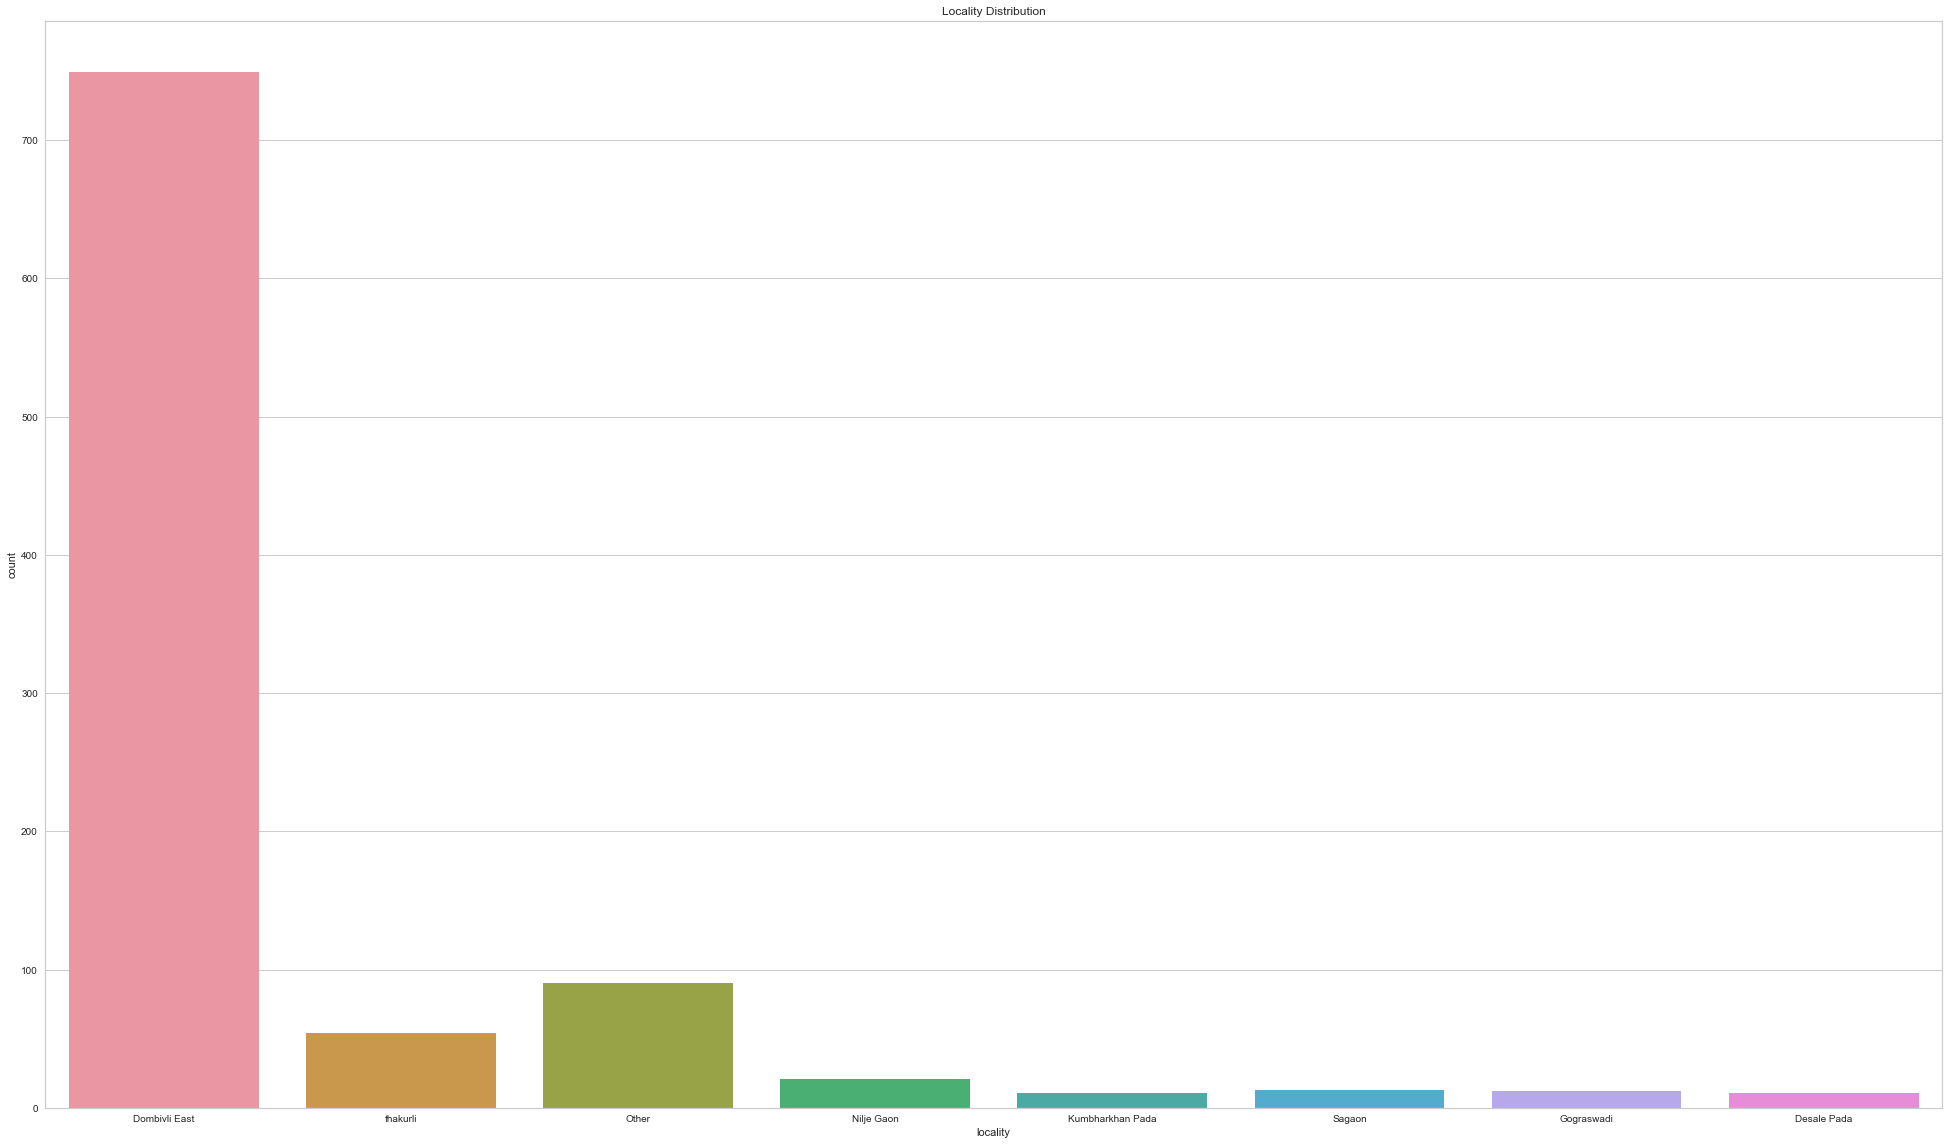

In [32]:
plt.figure(figsize=(34,20))
sns.countplot( x='locality', y=None, data = realestate_data)
plt.title('Locality Distribution')
plt.show()

### From above chart, most properties from Dombivil East Locality

<AxesSubplot:title={'center':'Max price of each locality'}, xlabel='price', ylabel='locality'>

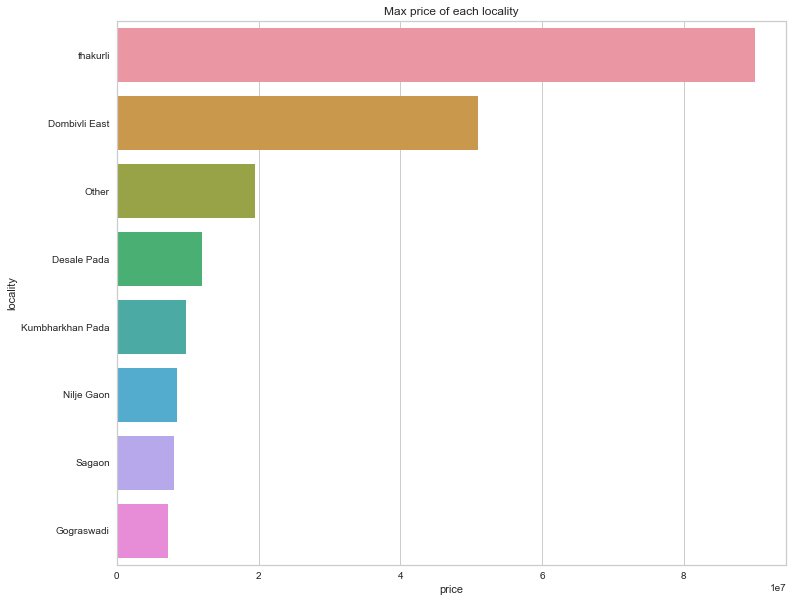

In [33]:
avg_price = realestate_data.groupby('locality', as_index=False)['price'].max()
avg_price
temp = realestate_data['locality'].value_counts().reset_index()
temp.columns = ['locality','count']
avg_price_bystatus = pd.merge(avg_price,temp,on='locality')

avg_price_bystatus = avg_price_bystatus.sort_values('price',ascending=False)
avg_price_bystatus

plt.figure(figsize=(12,10))
plt.title("Max price of each locality")
sns.barplot(x = 'price', y = 'locality', data = avg_price_bystatus.head(30))

### From above plot we can see that Thakurli has highest price.

<AxesSubplot:title={'center':'Max price of each Property '}, xlabel='price', ylabel='propertyName'>

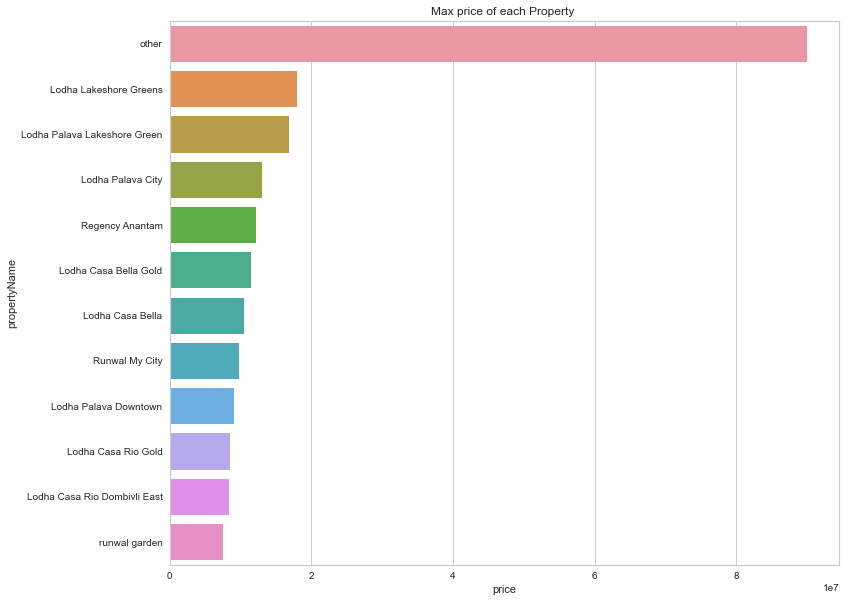

In [34]:
avg_price = realestate_data.groupby('propertyName', as_index=False)['price'].max()
avg_price
temp = realestate_data['propertyName'].value_counts().reset_index()
temp.columns = ['propertyName','count']
avg_price_bystatus = pd.merge(avg_price,temp,on='propertyName')

avg_price_bystatus = avg_price_bystatus.sort_values('price',ascending=False)
avg_price_bystatus

plt.figure(figsize=(12,10))
plt.title("Max price of each Property ")
sns.barplot(x = 'price', y = 'propertyName', data = avg_price_bystatus.head(30))

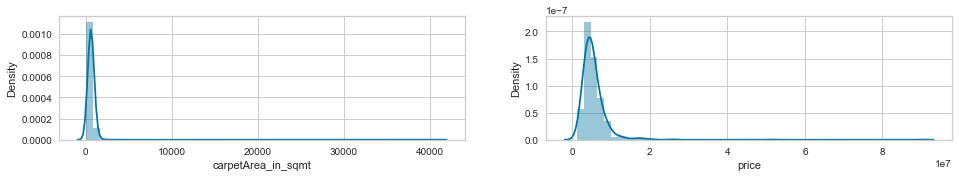

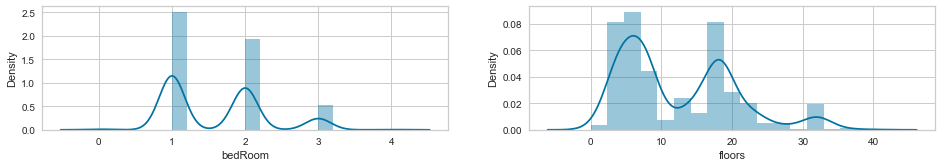

In [35]:
##Distribution plots for columns
plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(realestate_data['carpetArea_in_sqmt'])
plt.subplot(2,2,2)
sns.distplot(realestate_data['price'])
plt.figure(figsize=(16,5))
plt.subplot(2,2,3)
sns.distplot(realestate_data['bedRoom'])
plt.subplot(2,2,4)
sns.distplot(realestate_data['floors'])
plt.show()


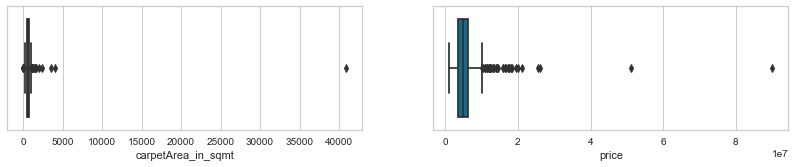

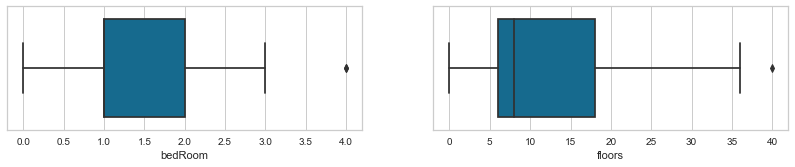

In [36]:
## Finding outliers using box plot 
plt.figure(figsize=(14,5))
plt.subplot(2,2,1)
sns.boxplot(realestate_data['carpetArea_in_sqmt'])
plt.subplot(2,2,2)
sns.boxplot(realestate_data['price'])

plt.figure(figsize=(14,5))
plt.subplot(2,2,3)
sns.boxplot(realestate_data['bedRoom'])
plt.subplot(2,2,4)
sns.boxplot(realestate_data['floors'])
plt.show()


### From boxplot we can see  carpet Area and price has more ouliers

In [37]:
## carpet area and price data has skewed, using IQR we can detect and handel with outliers

## trimming carpet area ouliers
percentile25 = realestate_data['carpetArea_in_sqmt'].quantile(0.25)
percentile75 = realestate_data['carpetArea_in_sqmt'].quantile(0.75)
iqr=percentile75-percentile25
upper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

new_realestate_data_upper=realestate_data[realestate_data['carpetArea_in_sqmt'] > upper_limit]
print('upper outliers in carpet area:',new_realestate_data_upper)

new_realestate_data_lower=realestate_data[realestate_data['carpetArea_in_sqmt'] < lower_limit]
print(' Lower outliers in carpet area:',new_realestate_data_lower)

new_realestate_data_upper=realestate_data[realestate_data['carpetArea_in_sqmt'] > upper_limit].index
new_realestate_data_lower=realestate_data[realestate_data['carpetArea_in_sqmt'] < lower_limit].index

realestate_data.drop(new_realestate_data_upper,axis=0,inplace=True)
realestate_data_trim=realestate_data.reset_index()
realestate_data_trim.drop('index',axis=1,inplace=True)
realestate_data_trim

realestate_data.drop(new_realestate_data_lower,axis=0,inplace=True)
realestate_data_trim=realestate_data.reset_index()
realestate_data_trim.drop('index',axis=1,inplace=True)
realestate_data_trim

## trimming price outliers

ppercentile25 = realestate_data_trim['price'].quantile(0.25)
ppercentile75 = realestate_data_trim['price'].quantile(0.75)
piqr=ppercentile75-ppercentile25
pupper_limit = ppercentile75 + 1.5 * piqr
plower_limit = ppercentile25 - 1.5 * piqr
pnew_realestate_data_upper=realestate_data_trim[realestate_data_trim['price'] > pupper_limit]
print("upper outliers in price:",pnew_realestate_data_upper)
#pnew_realestate_data_lower=realestate_data_trim[realestate_data_trim['price'] < plower_limit]
#print("lower outliers in price:",pnew_realestate_data_lower)
pnew_realestate_data_upper=realestate_data_trim[realestate_data_trim['price'] > pupper_limit].index
#pnew_realestate_data=realestate_data_trim[realestate_data_trim['price'] < plower_limit].index

realestate_data_trim.drop(pnew_realestate_data_upper,axis=0,inplace=True) 
realestate_data_trim=realestate_data_trim.reset_index()
realestate_data_trim.drop('index',axis=1,inplace=True)

#realestate_data_trim.drop(pnew_realestate_data_lower,axis=0,inplace=True) 
#realestate_data_trim=realestate_data_trim.reset_index()
#realestate_data_trim.drop('index',axis=1,inplace=True)


realestate_data_trim



upper outliers in carpet area:      carpetArea_in_sqmt       price              status       locality  \
17               1069.0  11016045.0          New Launch  Dombivli East   
25               1196.0  12000000.0  Under Construction  Dombivli East   
26               2458.0  25550000.0  Under Construction  Dombivli East   
36               1300.0  26000000.0       Ready to move  Dombivli East   
37               1180.0  13000000.0       Ready to move          Other   
116              1200.0  17500000.0       Ready to move  Dombivli East   
122              1201.0  17600000.0       Ready to move  Dombivli East   
123              1115.0  16000000.0       Ready to move  Dombivli East   
276              1180.0  12500000.0       Ready to move  Dombivli East   
280              4000.0  90000000.0       Ready to move       thakurli   
305              1200.0  12000000.0       Ready to move  Dombivli East   
315              1160.0  16000000.0       Ready to move  Dombivli East   
397    

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,217.190,1954028.0,Ready to move,Dombivli East,other,29,0
1,473.500,4948415.0,Ready to move,Dombivli East,Regency Anantam,23,1
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
3,598.000,9015956.0,Under Construction,Dombivli East,other,7,2
4,475.000,1757500.0,Ready to move,Dombivli East,other,7,1
...,...,...,...,...,...,...,...
894,541.450,8500000.0,Ready to move,Dombivli East,other,8,1
895,406.850,4741049.0,Ready to move,Other,other,6,2
896,580.265,6803589.0,Ready to move,Dombivli East,other,12,2
897,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


In [38]:
## Dataset after trimming outliers
realestate_data_trim

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
0,217.190,1954028.0,Ready to move,Dombivli East,other,29,0
1,473.500,4948415.0,Ready to move,Dombivli East,Regency Anantam,23,1
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2
3,598.000,9015956.0,Under Construction,Dombivli East,other,7,2
4,475.000,1757500.0,Ready to move,Dombivli East,other,7,1
...,...,...,...,...,...,...,...
894,541.450,8500000.0,Ready to move,Dombivli East,other,8,1
895,406.850,4741049.0,Ready to move,Other,other,6,2
896,580.265,6803589.0,Ready to move,Dombivli East,other,12,2
897,760.970,9546755.5,Ready to move,Dombivli East,other,7,1


In [39]:
realestate_data_trim.describe(include='all')

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom
count,899.000000,8.990000e+02,899,899,899,899.000000,899.000000
unique,NaN,NaN,3,8,12,NaN,NaN
top,NaN,NaN,Ready to move,Dombivli East,other,NaN,NaN
freq,NaN,NaN,849,696,514,NaN,NaN
mean,574.014227,4.867130e+06,NaN,NaN,NaN,12.288098,1.563960
std,152.929266,1.737436e+06,NaN,NaN,NaN,7.982329,0.664962
min,217.190000,1.150000e+06,NaN,NaN,NaN,0.000000,0.000000
25%,450.000000,3.521522e+06,NaN,NaN,NaN,6.000000,1.000000
50%,557.500000,4.600000e+06,NaN,NaN,NaN,8.000000,1.000000
75%,684.500000,5.831034e+06,NaN,NaN,NaN,18.000000,2.000000


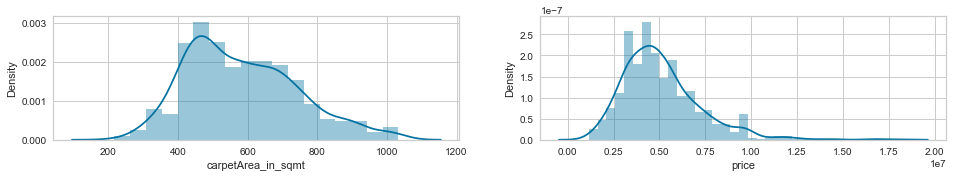

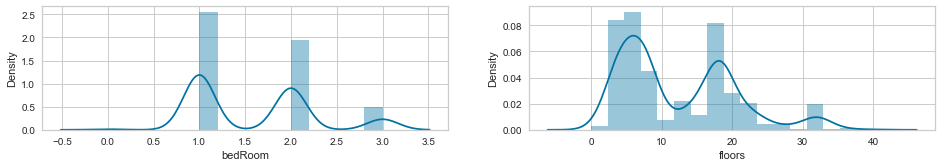

In [40]:
## After trimming checking distributions

plt.figure(figsize=(16,5))
plt.subplot(2,2,1)
sns.distplot(realestate_data['carpetArea_in_sqmt'])
plt.subplot(2,2,2)
sns.distplot(realestate_data['price'])
plt.figure(figsize=(16,5))
plt.subplot(2,2,3)
sns.distplot(realestate_data['bedRoom'])
plt.subplot(2,2,4)
sns.distplot(realestate_data['floors'])
plt.show()


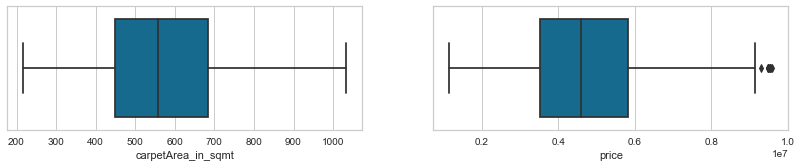

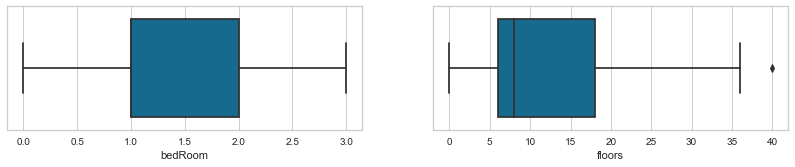

In [41]:
## After trimming outliers
plt.figure(figsize=(14,5))
plt.subplot(2,2,1)
sns.boxplot(realestate_data_trim['carpetArea_in_sqmt'])
plt.subplot(2,2,2)
sns.boxplot(realestate_data_trim['price'])

plt.figure(figsize=(14,5))
plt.subplot(2,2,3)
sns.boxplot(realestate_data_trim['bedRoom'])
plt.subplot(2,2,4)
sns.boxplot(realestate_data_trim['floors'])
plt.show()


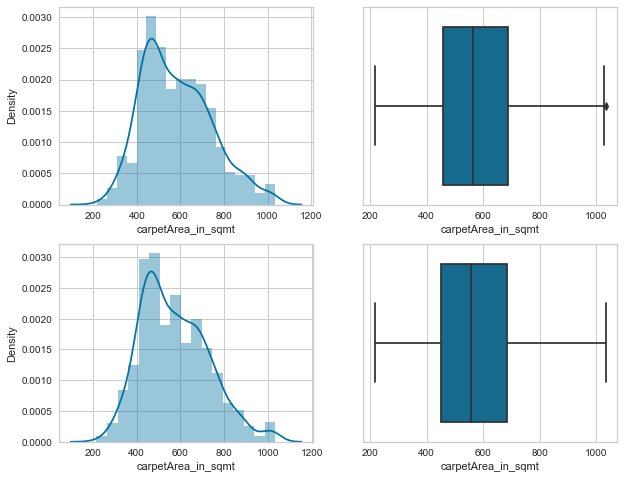

In [42]:
## checking outliers before and after trimming for carpet area
plt.figure(figsize=(10,8))
plt.subplot(2,2,1)
sns.distplot(realestate_data['carpetArea_in_sqmt'])
plt.subplot(2,2,2)
sns.boxplot(realestate_data['carpetArea_in_sqmt'])
plt.subplot(2,2,3)
sns.distplot(realestate_data_trim['carpetArea_in_sqmt'])
plt.subplot(2,2,4)
sns.boxplot(realestate_data_trim['carpetArea_in_sqmt'])
plt.show()

<AxesSubplot:>

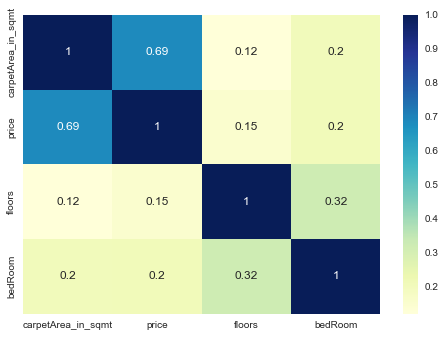

In [43]:
# plt.figure(figsize=(15,8))
sns.heatmap(realestate_data.corr(),annot=True,cmap="YlGnBu")

                  Correlation between target and independent variables            


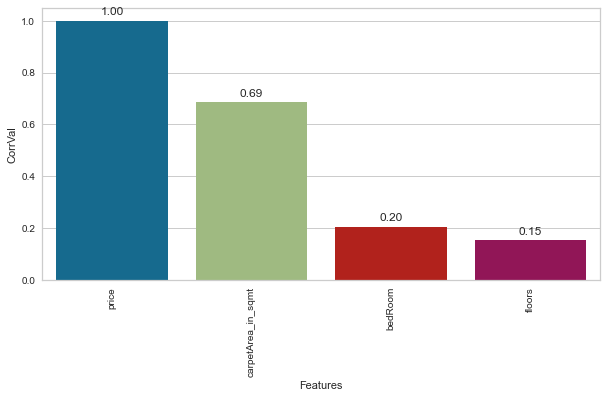

In [44]:
xCorr = realestate_data.corr()['price']
targetcorr = pd.DataFrame({'Features':xCorr.index, 'CorrVal':xCorr.values})
targetcorr = targetcorr.sort_values(by=['CorrVal'], ascending=False)
plt.figure(figsize=(10,5))
print("                  Correlation between target and independent variables            ")
splot = sns.barplot(x = targetcorr['Features'], y=targetcorr['CorrVal'])
for p in splot.patches:
 splot.annotate(format(p.get_height(), '.2f'), 
 (p.get_x() + p.get_width() / 2., p.get_height()), 
 ha = 'center', va = 'center', 
 xytext = (0, 9), 
 textcoords = 'offset points')
plt.xticks(rotation=90)
plt.show()

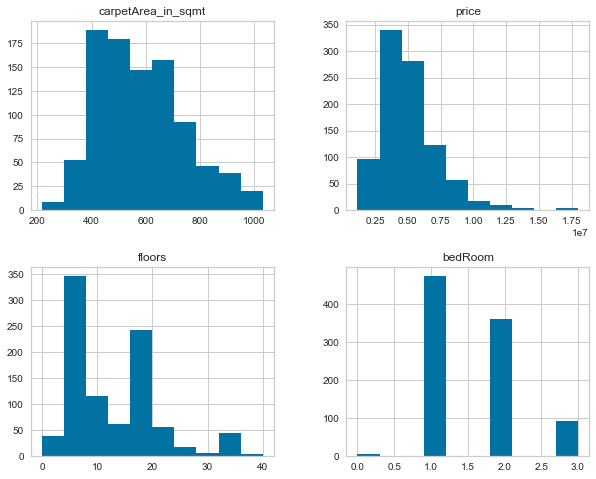

In [45]:
## Before trimming
realestate_data.hist(figsize=(10,8))
plt.show()

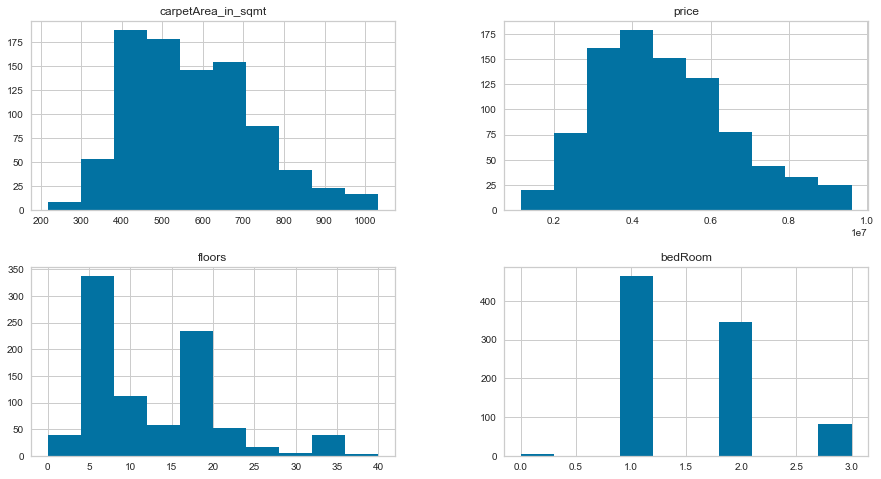

In [46]:
## After trimming
realestate_data_trim.hist(figsize=(15,8))
plt.show()

In [47]:
## creating dummy variables  before trimming dataset
dummies=pd.get_dummies(realestate_data.locality)
realestate_data=pd.concat([realestate_data,dummies],axis='columns')
dummies1=pd.get_dummies(realestate_data.status)
realestate_data=pd.concat([realestate_data,dummies1],axis='columns')
dummies2=pd.get_dummies(realestate_data.propertyName)
realestate_data=pd.concat([realestate_data,dummies2],axis='columns')
realestate_data



,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom,Desale Pada,Dombivli East,Gograswadi,...,Lodha Casa Rio Dombivli East,Lodha Casa Rio Gold,Lodha Lakeshore Greens,Lodha Palava City,Lodha Palava Downtown,Lodha Palava Lakeshore Green,Regency Anantam,Runwal My City,other,runwal garden
0,217.190,1954028.0,Ready to move,Dombivli East,other,29,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,473.500,4948415.0,Ready to move,Dombivli East,Regency Anantam,23,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,598.000,9015956.0,Under Construction,Dombivli East,other,7,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,759.000,14121195.0,Under Construction,Dombivli East,other,7,3,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,541.450,8500000.0,Ready to move,Dombivli East,other,8,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
965,406.850,4741049.0,Ready to move,Other,other,6,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
966,580.265,6803589.0,Ready to move,Dombivli East,other,12,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
967,760.970,9546755.5,Ready to move,Dombivli East,other,7,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [48]:
realestate_data=realestate_data.drop(['status','locality','propertyName','other','Other','New Launch'],axis='columns')
realestate_data.reset_index().drop('index',axis=1,inplace=True)
realestate_data


,carpetArea_in_sqmt,price,floors,bedRoom,Desale Pada,Dombivli East,Gograswadi,Kumbharkhan Pada,Nilje Gaon,Sagaon,...,Lodha Casa Bella Gold,Lodha Casa Rio Dombivli East,Lodha Casa Rio Gold,Lodha Lakeshore Greens,Lodha Palava City,Lodha Palava Downtown,Lodha Palava Lakeshore Green,Regency Anantam,Runwal My City,runwal garden
0,217.190,1954028.0,29,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,473.500,4948415.0,23,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,689.000,7800834.5,23,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,598.000,9015956.0,7,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,759.000,14121195.0,7,3,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,541.450,8500000.0,8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,406.850,4741049.0,6,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,580.265,6803589.0,12,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
967,760.970,9546755.5,7,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [49]:
X=realestate_data.drop('price',axis='columns')
y=realestate_data.price

In [50]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=7)

In [52]:
realestate_data_scaled=realestate_data.copy()
## scale the data using roboust scaler
col_names=['carpetArea_in_sqmt','price','floors','bedRoom']
features = realestate_data_scaled[col_names]
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
realestate_data_scaled[col_names] = scaler.fit_transform(features.values)
realestate_data_scaled

,carpetArea_in_sqmt,price,floors,bedRoom,Desale Pada,Dombivli East,Gograswadi,Kumbharkhan Pada,Nilje Gaon,Sagaon,...,Lodha Casa Bella Gold,Lodha Casa Rio Dombivli East,Lodha Casa Rio Gold,Lodha Lakeshore Greens,Lodha Palava City,Lodha Palava Downtown,Lodha Palava Lakeshore Green,Regency Anantam,Runwal My City,runwal garden
0,-1.512217,-1.135873,1.750000,-1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.397826,0.102757,1.250000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.539130,1.282662,1.250000,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.143478,1.785297,-0.083333,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.843478,3.897082,-0.083333,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.102391,1.571872,0.000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,-0.687609,0.016980,-0.166667,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0.066370,0.870151,0.333333,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
967,0.852043,2.004863,-0.083333,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
X_scaled=realestate_data_scaled.drop('price',axis='columns')
y_scaled=realestate_data_scaled.price

In [54]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y_scaled,test_size=0.2,random_state=7)

In [55]:
linear_scaled=LinearRegression()
linear_scaled.fit(X_scaled,y_scaled)
linear_scaled.score(X_scaled,y_scaled)

0.523116133620092

#### After removing outliers

In [56]:
dummies=pd.get_dummies(realestate_data_trim.locality)
realestate_data_trim=pd.concat([realestate_data_trim,dummies],axis='columns')
dummies1=pd.get_dummies(realestate_data_trim.status)
realestate_data_trim=pd.concat([realestate_data_trim,dummies1],axis='columns')
dummies2=pd.get_dummies(realestate_data_trim.propertyName)
realestate_data_trim=pd.concat([realestate_data_trim,dummies2],axis='columns')
realestate_data_trim

,carpetArea_in_sqmt,price,status,locality,propertyName,floors,bedRoom,Desale Pada,Dombivli East,Gograswadi,...,Lodha Casa Rio Dombivli East,Lodha Casa Rio Gold,Lodha Lakeshore Greens,Lodha Palava City,Lodha Palava Downtown,Lodha Palava Lakeshore Green,Regency Anantam,Runwal My City,other,runwal garden
0,217.190,1954028.0,Ready to move,Dombivli East,other,29,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1,473.500,4948415.0,Ready to move,Dombivli East,Regency Anantam,23,1,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,689.000,7800834.5,Ready to move,Dombivli East,Regency Anantam,23,2,0,1,0,...,0,0,0,0,0,0,1,0,0,0
3,598.000,9015956.0,Under Construction,Dombivli East,other,7,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,475.000,1757500.0,Ready to move,Dombivli East,other,7,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,541.450,8500000.0,Ready to move,Dombivli East,other,8,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0
895,406.850,4741049.0,Ready to move,Other,other,6,2,0,0,0,...,0,0,0,0,0,0,0,0,1,0
896,580.265,6803589.0,Ready to move,Dombivli East,other,12,2,0,1,0,...,0,0,0,0,0,0,0,0,1,0
897,760.970,9546755.5,Ready to move,Dombivli East,other,7,1,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [57]:
realestate_data_trim=realestate_data_trim.drop(['status','locality','propertyName','New Launch','Other','other'],axis='columns')
realestate_data_trim.reset_index().drop('index',axis=1,inplace=True)
realestate_data_trim


,carpetArea_in_sqmt,price,floors,bedRoom,Desale Pada,Dombivli East,Gograswadi,Kumbharkhan Pada,Nilje Gaon,Sagaon,...,Lodha Casa Bella Gold,Lodha Casa Rio Dombivli East,Lodha Casa Rio Gold,Lodha Lakeshore Greens,Lodha Palava City,Lodha Palava Downtown,Lodha Palava Lakeshore Green,Regency Anantam,Runwal My City,runwal garden
0,217.190,1954028.0,29,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,473.500,4948415.0,23,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,689.000,7800834.5,23,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,598.000,9015956.0,7,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,475.000,1757500.0,7,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
894,541.450,8500000.0,8,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
895,406.850,4741049.0,6,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
896,580.265,6803589.0,12,2,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
897,760.970,9546755.5,7,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
X_trim=realestate_data_trim.drop('price',axis='columns')
y_trim=realestate_data_trim.price

In [59]:
scaled_data_trim=realestate_data.copy()
## scale the data using roboust scaler
col_names=['carpetArea_in_sqmt','price','floors','bedRoom']
features = scaled_data_trim[col_names]
from sklearn.preprocessing import RobustScaler
scaler = RobustScaler()
scaled_data_trim[col_names] = scaler.fit_transform(features.values)
scaled_data_trim


,carpetArea_in_sqmt,price,floors,bedRoom,Desale Pada,Dombivli East,Gograswadi,Kumbharkhan Pada,Nilje Gaon,Sagaon,...,Lodha Casa Bella Gold,Lodha Casa Rio Dombivli East,Lodha Casa Rio Gold,Lodha Lakeshore Greens,Lodha Palava City,Lodha Palava Downtown,Lodha Palava Lakeshore Green,Regency Anantam,Runwal My City,runwal garden
0,-1.512217,-1.135873,1.750000,-1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.397826,0.102757,1.250000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0.539130,1.282662,1.250000,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0.143478,1.785297,-0.083333,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0.843478,3.897082,-0.083333,2.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
964,-0.102391,1.571872,0.000000,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
965,-0.687609,0.016980,-0.166667,1.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
966,0.066370,0.870151,0.333333,1.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
967,0.852043,2.004863,-0.083333,0.0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
X_scaled_trim=scaled_data_trim.drop('price',axis='columns')
y_scaled_trim=scaled_data_trim.price

In [61]:
linear_scaled_trim=LinearRegression()
linear_scaled_trim.fit(X_scaled_trim,y_scaled_trim)
linear_scaled.score(X_scaled_trim,y_scaled_trim)

0.523116133620092

In [62]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=1)
regressor=cross_val_score(LinearRegression(),X_scaled_trim,y_scaled_trim,cv=cv)
regressor

array([0.55022552, 0.54682634, 0.45480229, 0.5090703 , 0.43164982])

In [63]:
np.average(regressor)

0.4985148534299987

In [64]:
cv=ShuffleSplit(n_splits=5,test_size=0.2,random_state=1)
regressorL=cross_val_score(Lasso(),X,y,cv=cv)
regressorL

array([0.55022659, 0.54682636, 0.45480614, 0.50907572, 0.43165101])

In [65]:
np.average(regressorL)

0.4985171623776162

## 5.Model Building

#### Defining function for best model ,best score and tuned parameters

In [66]:
def find_best_model_using_gridsearch(X,y):
    algorithems={
        'linear_regression' :{
            'model' : LinearRegression(),
            'params' :{
                'normalize':[True,False]
            }
        },
        'lasso ':{
            'model':Lasso(),
            'params' :{
                'alpha' :[1,2],
                'selection' : ['random','cyclic']
            }
        },
        'decision_tree' :{
            'model' : DecisionTreeRegressor(),
            'params' : {
                'criterion' : ['mse','friedman_mse'],
                'splitter' : ['best','random']
        }
    },
        'Randomforest_regressor' :{
            'model' : RandomForestRegressor(),
            'params' :{
                'n_estimators': [100, 200, 250, 300],
                'max_depth': [3,7,9],    
                'random_state': [42]
         }
     },
            'GradientBoostingRegressor':{
                'model' : GradientBoostingRegressor(),
                'params' :{
                    'n_estimators': [100, 200, 250, 300],
                    'learning_rate': [0.01, 0.02, 0.06, 0.1, 0.3],
                    'max_depth': [3, 5, 7, 9],    
                    'random_state': [42]
            }
        },
        'XGBRegressor' :{
            'model' :XGBRegressor(verbosity=0),
            'params' :{
                'n_estimators': [100, 200, 250, 300],
                'learning_rate': [0.01, 0.02, 0.06, 0.1, 0.3],
                'max_depth': [3, 5, 7, 9],
                'gamma': [0.01, 0.02],
                'random_state': [42]
            }
        }
    }
    scores=[]
    cv = ShuffleSplit(n_splits=5,test_size=0.20,random_state=7)
    for algorithem_name,config in algorithems.items():
        gs=GridSearchCV(config['model'],config['params'],cv=cv,return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model' :algorithem_name,
            'best_score' :gs.best_score_,
            'best_params' :gs.best_params_
        })
    model=pd.DataFrame(scores,columns=['model','best_score','best_params'])
    return model
        

print("                    Accuracy before trimming ouliers              ")
print(find_best_model_using_gridsearch(X,y))
print("                   Acuracy before trimming outliers for scaled data               ")
print(find_best_model_using_gridsearch(X_scaled,y_scaled))
print("                   Acuracy after trimming outliers                  ")
print(find_best_model_using_gridsearch(X_trim,y_trim))
print("                   Acuracy after trimming outliers for scaled data               ")
print(find_best_model_using_gridsearch(X_scaled_trim,y_scaled_trim)) 

                    Accuracy before trimming ouliers              
                       model  best_score  \
0          linear_regression    0.484399   
1                     lasso     0.484405   
2              decision_tree    0.202831   
3     Randomforest_regressor    0.530944   
4  GradientBoostingRegressor    0.527857   
5               XGBRegressor    0.557781   

                                         best_params  
0                                {'normalize': True}  
1                {'alpha': 2, 'selection': 'random'}  
2           {'criterion': 'mse', 'splitter': 'best'}  
3  {'max_depth': 7, 'n_estimators': 200, 'random_...  
4  {'learning_rate': 0.01, 'max_depth': 3, 'n_est...  
5  {'gamma': 0.01, 'learning_rate': 0.02, 'max_de...  
                   Acuracy before trimming outliers for scaled data               
                       model  best_score  \
0          linear_regression    0.484399   
1                     lasso    -0.003639   
2              decision_

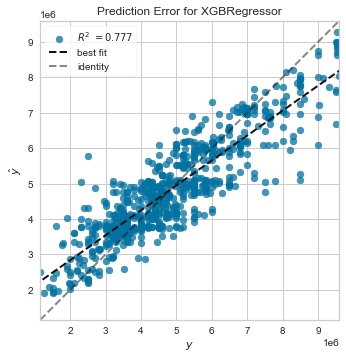

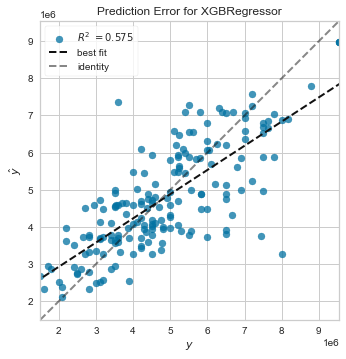

                 Merics for train data after  removing outliers    
MSE: 679310546048.1581
R²: 0.7773866137624564
MAE: 635887.8445757998
MSR: 824202.9762432056
                 Merics for test data after removing outliers     
MSE: 1219553646785.403
R²: 0.5751035040027452
MAE: 846274.1541666667
MSR: 1104334.0286278436


In [67]:
## comparing above models XGBRegressor is the best model, Using this model we predicting price.
from yellowbrick.regressor import PredictionError
from yellowbrick.regressor import ResidualsPlot

##  Model building and model evaluation after removing outliers 
X_trim=realestate_data_trim.drop('price',axis='columns')
y_trim=realestate_data_trim.price

X_train_trim,X_test_trim,y_train_trim,y_test_trim=train_test_split(X_trim,y_trim,test_size=0.2,random_state=7)


XGBR=XGBRegressor(gamma= 0.01,learning_rate=0.02, max_depth =5, n_estimators= 300, random_state=4)
XGBR.fit(X_train_trim,y_train_trim)
XGBR.score(X_test_trim,y_test_trim)

predict_train_trim=XGBR.predict(X_train_trim)
predict_train_trim

predict_test_trim=XGBR.predict(X_test_trim)
predict_test_trim



viz = PredictionError(XGBR).fit(X_train_trim, y_train_trim)
viz.score(X_train_trim, y_train_trim)
viz.poof();
viz = PredictionError(XGBR).fit(X_test_trim, y_test_trim)
viz.score(X_test_trim, y_test_trim)
viz.poof();

print("                 Merics for train data after  removing outliers    ")
print('MSE:',metrics.mean_squared_error(y_train_trim,predict_train_trim))
print('R²:',r2_score(y_train_trim, predict_train_trim))
print('MAE:',metrics.mean_absolute_error(y_train_trim,predict_train_trim))
print('MSR:',np.sqrt(metrics.mean_squared_error(y_train_trim, predict_train_trim)))

print("                 Merics for test data after removing outliers     ")
print('MSE:',metrics.mean_squared_error(y_test_trim,predict_test_trim))
print('R²:',r2_score(y_test_trim, predict_test_trim))
print('MAE:',metrics.mean_absolute_error(y_test_trim,predict_test_trim))
print('MSR:',np.sqrt(metrics.mean_squared_error(y_test_trim, predict_test_trim)))

In [68]:
import joblib
joblib.dump(XGBR,'hp_model.ml')

['hp_model.ml']

# Model Building on Linear Regression
- Taking linear model for deployment 

In [72]:
data1=pd.read_csv("Prop_info.csv")
data1

,carpetArea,areaUnit,price,status,latitude,longitude,locality,propertyName,floors,bedRoom
0,396.500,sq.ft.,price on req,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,1
1,622.500,sq.ft.,price on req,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,2
2,217.190,sq.ft.,1954028,Ready To Move,19.186546,73.068871,Dombivli East,Marathon Nexworld,29,0
3,473.500,sq.ft.,4948415,Ready To Move,19.207707,73.111643,Dombivli East,Regency Anantam,23,1
4,689.000,sq.ft.,7800834.5,Ready To Move,19.207707,73.111643,Dombivli East,Regency Anantam,23,2
...,...,...,...,...,...,...,...,...,...,...
1069,541.450,sq.ft.,8500000,Ready to move,19.216143,73.098962,Dombivli East,Lodha Palava Casa Rio Gold,8,1
1070,406.850,sq.ft.,4741049,Ready To Move,19.208666,73.107237,MIDC,Milap Nagar,6,2
1071,580.265,sq.ft.,6803589,Ready To Move,19.207109,73.101212,Dombivli East,Rohit Shiv Kripa Residency,12,2
1072,760.970,sq.ft.,9546755.5,Ready To Move,19.210405,73.102739,Dombivli East,Reliable Arcade,7,1


In [75]:
raw = data1[['price','locality','propertyName','carpetArea','floors','bedRoom']]

In [76]:
raw = raw[raw.price != 'price on req']
raw.head()

,price,locality,propertyName,carpetArea,floors,bedRoom
2,1954028,Dombivli East,Marathon Nexworld,217.19,29,0
3,4948415,Dombivli East,Regency Anantam,473.50,23,1
4,7800834.5,Dombivli East,Regency Anantam,689.00,23,2
5,9015956,Dombivli East,Lodha Codename Premier,598.00,7,2
6,14121195,Dombivli East,Lodha Codename Premier,759.00,7,3


In [77]:
raw.price = np.log(raw.price.astype('float64'))
#raw.carpetArea = np.log(raw.carpetArea.astype('float64'))

raw.head()

,price,locality,propertyName,carpetArea,floors,bedRoom
2,14.485403,Dombivli East,Marathon Nexworld,217.19,29,0
3,15.414578,Dombivli East,Regency Anantam,473.50,23,1
4,15.869741,Dombivli East,Regency Anantam,689.00,23,2
5,16.014506,Dombivli East,Lodha Codename Premier,598.00,7,2
6,16.463187,Dombivli East,Lodha Codename Premier,759.00,7,3


In [79]:
raw.carpetArea = np.log(raw.carpetArea)

In [80]:
raw.propertyName.unique().size

414

In [81]:
raw.locality.unique().size

33

In [82]:
enc = pd.get_dummies(raw,prefix='')
enc

,price,carpetArea,floors,bedRoom,_Ayodhya Nagari,_Azde Gaon,_Balaji Nagar,_Bhadra Nagar,_Chole Gaon,_Dattanagar,...,_takshila building,_varadvinayak society,_vashant vihar,_vastu vihar,_venus sky city,_vighnahartaChs,_vijay drishti,_villas royale,_vinayak smruti chs.,_vrindavan society
2,14.485403,5.380773,29,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,15.414578,6.160152,23,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,15.869741,6.535241,23,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,16.014506,6.393591,7,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,16.463187,6.632002,7,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1069,15.955577,6.294251,8,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1070,15.371769,6.008445,6,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1071,15.732961,6.363485,12,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1072,16.071712,6.634594,7,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [83]:
total = [i[1:] for i in enc.columns[4:]]

In [84]:
encMIDC = [int(i=='MIDC') for i in total]

In [85]:
data = dict(feature=total)

In [89]:
with open(r'prediction models\featureMap.json','r') as file:
    colc = json.load(file)

In [90]:
inp = [200,1,1] + [int(i.lower() == 'Balaji Nagar'.lower()) for i in colc['feature']]

In [91]:
x = enc.drop(columns='price')
y = enc[['price']]

x.head()

,carpetArea,floors,bedRoom,_Ayodhya Nagari,_Azde Gaon,_Balaji Nagar,_Bhadra Nagar,_Chole Gaon,_Dattanagar,_Dawadi Gaon,...,_takshila building,_varadvinayak society,_vashant vihar,_vastu vihar,_venus sky city,_vighnahartaChs,_vijay drishti,_villas royale,_vinayak smruti chs.,_vrindavan society
2,5.380773,29,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6.160152,23,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,6.535241,23,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6.393591,7,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,6.632002,7,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [92]:
model = LinearRegression()

model.fit(x,y)

LinearRegression()

In [93]:
model.score(x,y)

#best score in linear regression

0.7588314866979299

In [94]:
pickle.dump(model,open('estModel.pkl','wb'))

#creating pcikle files